In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

### Iris Dataset

In [2]:
iris_df = pd.read_csv('iris.csv')
iris_df

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa
...,...,...,...,...,...
144,6.7,3.0,5.2,2.3,Iris-virginica
145,6.3,2.5,5.0,1.9,Iris-virginica
146,6.5,3.0,5.2,2.0,Iris-virginica
147,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
iris_df.columns= ['sepal_lenght','sepal_width','petal_lenght','petal_width','species']
decoder = {
    0 : 'Iris-setosa',
    1 : 'Iris-versicolor',
    2 : 'Iris-virginica'
}
def converter(specie):
    if specie == 'Iris-setosa':
        return 0
    elif specie == 'Iris-versicolor':
        return 1
    else:
        return 2
iris_df['species'] = iris_df['species'].apply(converter)
iris_df

,sepal_lenght,sepal_width,petal_lenght,petal_width,species
0,4.9,3.0,1.4,0.2,0
1,4.7,3.2,1.3,0.2,0
2,4.6,3.1,1.5,0.2,0
3,5.0,3.6,1.4,0.2,0
4,5.4,3.9,1.7,0.4,0
...,...,...,...,...,...
144,6.7,3.0,5.2,2.3,2
145,6.3,2.5,5.0,1.9,2
146,6.5,3.0,5.2,2.0,2
147,6.2,3.4,5.4,2.3,2


# Tanpa Pembersihan

### Logistic Regression

In [4]:
# Variables
X= iris_df.drop(labels= 'species', axis= 1)
y= iris_df['species']

# Splitting the Dataset 
def log_regression(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.33, random_state= 101)

    classifier = LogisticRegression(random_state = 0)
    classifier.fit(X_train, y_train)

    y_pred = classifier.predict(X_test)
    return y_test , y_pred
    # # Evaluating Model's Performance
y_test,pred =log_regression(X,y)



In [5]:
cnf_matrix = confusion_matrix(y_test, pred)
  
print ("Confusion Matrix : \n", cnf_matrix)

Confusion Matrix : 
 [[16  0  0]
 [ 0 19  2]
 [ 0  1 12]]


#### Iris-Setosa

In [6]:
TP_setosa = cnf_matrix[0][0]
FN_setosa = cnf_matrix[0][1]+cnf_matrix[0][2]
FP_setosa = cnf_matrix[1][0]+cnf_matrix[2][0]
TN_setosa = cnf_matrix[1][1]+cnf_matrix[1][2]+cnf_matrix[2][1]+cnf_matrix[2][2]
print('TP=',TP_setosa)
print('FN=',FN_setosa)
print('FP=',FP_setosa)
print('TN=',TN_setosa)

TP= 16
FN= 0
FP= 0
TN= 34


In [7]:
Sensitivity_setosa = TP_setosa/(TP_setosa+FN_setosa)
Specificity_setosa = TN_setosa/(TN_setosa+FP_setosa)
Precision_setosa = TP_setosa/(TP_setosa+FP_setosa)
NPV_setosa = TN_setosa/(TN_setosa+FN_setosa)
Accuracy_setosa = (TP_setosa+TN_setosa)/(TP_setosa+FN_setosa+FP_setosa+TN_setosa)
print('Sensitivity',Sensitivity_setosa)
print('Specificity',Specificity_setosa)
print('Precision',Precision_setosa)
print('NPV',NPV_setosa)
print('Accuracy',Accuracy_setosa)

Sensitivity 1.0
Specificity 1.0
Precision 1.0
NPV 1.0
Accuracy 1.0


#### Iris-versicolor

In [8]:
TP_versicolor = cnf_matrix[1][1]
FN_versicolor = cnf_matrix[1][0]+cnf_matrix[1][2]
FP_versicolor = cnf_matrix[0][1]+cnf_matrix[2][1]
TN_versicolor = cnf_matrix[0][0]+cnf_matrix[0][2]+cnf_matrix[2][0]+cnf_matrix[2][2]
print('TP=',TP_versicolor)
print('FN=',FN_versicolor)
print('FP=',FP_versicolor)
print('TN=',TN_versicolor)

TP= 19
FN= 2
FP= 1
TN= 28


In [9]:
Sensitivity_versicolor = TP_versicolor/(TP_versicolor+FN_versicolor)
Specificity_versicolor = TN_versicolor/(TN_versicolor+FP_versicolor)
Precision_versicolor = TP_versicolor/(TP_versicolor+FP_versicolor)
NPV_versicolor = TN_versicolor/(TN_versicolor+FN_versicolor)
Accuracy_versicolor = (TP_versicolor+TN_versicolor)/(TP_versicolor+FN_versicolor+FP_versicolor+TN_versicolor)
print('Sensitivity',Sensitivity_versicolor)
print('Specificity',Specificity_versicolor)
print('Precision',Precision_versicolor)
print('NPV',NPV_versicolor)
print('Accuracy',Accuracy_versicolor)

Sensitivity 0.9047619047619048
Specificity 0.9655172413793104
Precision 0.95
NPV 0.9333333333333333
Accuracy 0.94


#### Iris-virginica

In [10]:
TP_virginica = cnf_matrix[2][2]
FN_virginica = cnf_matrix[2][0]+cnf_matrix[2][1]
FP_virginica = cnf_matrix[0][2]+cnf_matrix[1][2]
TN_virginica = cnf_matrix[0][0]+cnf_matrix[0][1]+cnf_matrix[1][0]+cnf_matrix[1][1]
print('TP=',TP_virginica)
print('FN=',FN_virginica)
print('FP=',FP_virginica)
print('TN=',TN_virginica)

TP= 12
FN= 1
FP= 2
TN= 35


In [11]:
Sensitivity_virginica = TP_virginica/(TP_virginica+FN_virginica)
Specificity_virginica = TN_virginica/(TN_virginica+FP_virginica)
Precision_virginica = TP_virginica/(TP_virginica+FP_virginica)
NPV_virginica = TN_virginica/(TN_virginica+FN_virginica)
Accuracy_virginica = (TP_virginica+TN_virginica)/(TP_virginica+FN_virginica+FP_virginica+TN_virginica)
print('Sensitivity',Sensitivity_virginica)
print('Specificity',Specificity_virginica)
print('Precision',Precision_virginica)
print('NPV',NPV_virginica)
print('Accuracy',Accuracy_virginica)

Sensitivity 0.9230769230769231
Specificity 0.9459459459459459
Precision 0.8571428571428571
NPV 0.9722222222222222
Accuracy 0.94


### MLP

In [12]:
def mlp(X,y):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33)
    mlp = MLPClassifier(learning_rate='adaptive',hidden_layer_sizes=(30,))
    mlp.fit(X_train,y_train)
    y_pred=mlp.predict(X_test)
    return y_test,y_pred
X= iris_df.drop(labels= 'species', axis= 1)
y= iris_df['species']
y_test,y_pred=mlp(X,y)
# print(y_test,y_pred)

C:\Users\jmspa\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


### Confusion Matrix

In [13]:
cnf_matrix=confusion_matrix(y_test,y_pred)
print(cnf_matrix)

[[16  0  0]
 [ 0 10  6]
 [ 0  1 17]]


#### Iris-Setosa

In [14]:
TP_setosa = cnf_matrix[0][0]
FN_setosa = cnf_matrix[0][1]+cnf_matrix[0][2]
FP_setosa = cnf_matrix[1][0]+cnf_matrix[2][0]
TN_setosa = cnf_matrix[1][1]+cnf_matrix[1][2]+cnf_matrix[2][1]+cnf_matrix[2][2]
print('TP=',TP_setosa)
print('FN=',FN_setosa)
print('FP=',FP_setosa)
print('TN=',TN_setosa)

TP= 16
FN= 0
FP= 0
TN= 34


In [15]:
Sensitivity_setosa = TP_setosa/(TP_setosa+FN_setosa)
Specificity_setosa = TN_setosa/(TN_setosa+FP_setosa)
Precision_setosa = TP_setosa/(TP_setosa+FP_setosa)
NPV_setosa = TN_setosa/(TN_setosa+FN_setosa)
Accuracy_setosa = (TP_setosa+TN_setosa)/(TP_setosa+FN_setosa+FP_setosa+TN_setosa)
print('Sensitivity',Sensitivity_setosa)
print('Specificity',Specificity_setosa)
print('Precision',Precision_setosa)
print('NPV',NPV_setosa)
print('Accuracy',Accuracy_setosa)

Sensitivity 1.0
Specificity 1.0
Precision 1.0
NPV 1.0
Accuracy 1.0


#### Iris-versicolor

In [16]:
TP_versicolor = cnf_matrix[1][1]
FN_versicolor = cnf_matrix[1][0]+cnf_matrix[1][2]
FP_versicolor = cnf_matrix[0][1]+cnf_matrix[2][1]
TN_versicolor = cnf_matrix[0][0]+cnf_matrix[0][2]+cnf_matrix[2][0]+cnf_matrix[2][2]
print('TP=',TP_versicolor)
print('FN=',FN_versicolor)
print('FP=',FP_versicolor)
print('TN=',TN_versicolor)

TP= 10
FN= 6
FP= 1
TN= 33


In [17]:
Sensitivity_versicolor = TP_versicolor/(TP_versicolor+FN_versicolor)
Specificity_versicolor = TN_versicolor/(TN_versicolor+FP_versicolor)
Precision_versicolor = TP_versicolor/(TP_versicolor+FP_versicolor)
NPV_versicolor = TN_versicolor/(TN_versicolor+FN_versicolor)
Accuracy_versicolor = (TP_versicolor+TN_versicolor)/(TP_versicolor+FN_versicolor+FP_versicolor+TN_versicolor)
print('Sensitivity',Sensitivity_versicolor)
print('Specificity',Specificity_versicolor)
print('Precision',Precision_versicolor)
print('NPV',NPV_versicolor)
print('Accuracy',Accuracy_versicolor)

Sensitivity 0.625
Specificity 0.9705882352941176
Precision 0.9090909090909091
NPV 0.8461538461538461
Accuracy 0.86


#### Iris-virginica

In [18]:
TP_virginica = cnf_matrix[2][2]
FN_virginica = cnf_matrix[2][0]+cnf_matrix[2][1]
FP_virginica = cnf_matrix[0][2]+cnf_matrix[1][2]
TN_virginica = cnf_matrix[0][0]+cnf_matrix[0][1]+cnf_matrix[1][0]+cnf_matrix[1][1]
print('TP=',TP_virginica)
print('FN=',FN_virginica)
print('FP=',FP_virginica)
print('TN=',TN_virginica)

TP= 17
FN= 1
FP= 6
TN= 26


In [19]:
Sensitivity_virginica = TP_virginica/(TP_virginica+FN_virginica)
Specificity_virginica = TN_virginica/(TN_virginica+FP_virginica)
Precision_virginica = TP_virginica/(TP_virginica+FP_virginica)
NPV_virginica = TN_virginica/(TN_virginica+FN_virginica)
Accuracy_virginica = (TP_virginica+TN_virginica)/(TP_virginica+FN_virginica+FP_virginica+TN_virginica)
print('Sensitivity',Sensitivity_virginica)
print('Specificity',Specificity_virginica)
print('Precision',Precision_virginica)
print('NPV',NPV_virginica)
print('Accuracy',Accuracy_virginica)

Sensitivity 0.9444444444444444
Specificity 0.8125
Precision 0.7391304347826086
NPV 0.9629629629629629
Accuracy 0.86


## Penghapusan data terduplikasi

### Mendeteksi duplikasi data

In [20]:
dups = iris_df.duplicated()
print(dups.any())
print(iris_df[dups])

True
     sepal_lenght  sepal_width  petal_lenght  petal_width  species
33            4.9          3.1           1.5          0.1        0
36            4.9          3.1           1.5          0.1        0
141           5.8          2.7           5.1          1.9        2


### Menghapus kolom dengan duplikasi data

In [21]:
iris_df.drop_duplicates(inplace=True)
print(iris_df.shape)

(146, 5)


### Logistic Regression

In [22]:
X= iris_df.drop(labels= 'species', axis= 1)
y= iris_df['species']
y_test,pred =log_regression(X,y)

In [23]:
cm = confusion_matrix(y_test, pred)
  
print ("Confusion Matrix : \n", cm)

Confusion Matrix : 
 [[14  0  0]
 [ 0 21  1]
 [ 0  2 11]]


#### Iris-Setosa

In [24]:
TP_setosa = cnf_matrix[0][0]
FN_setosa = cnf_matrix[0][1]+cnf_matrix[0][2]
FP_setosa = cnf_matrix[1][0]+cnf_matrix[2][0]
TN_setosa = cnf_matrix[1][1]+cnf_matrix[1][2]+cnf_matrix[2][1]+cnf_matrix[2][2]
print('TP=',TP_setosa)
print('FN=',FN_setosa)
print('FP=',FP_setosa)
print('TN=',TN_setosa)

TP= 16
FN= 0
FP= 0
TN= 34


In [25]:
Sensitivity_setosa = TP_setosa/(TP_setosa+FN_setosa)
Specificity_setosa = TN_setosa/(TN_setosa+FP_setosa)
Precision_setosa = TP_setosa/(TP_setosa+FP_setosa)
NPV_setosa = TN_setosa/(TN_setosa+FN_setosa)
Accuracy_setosa = (TP_setosa+TN_setosa)/(TP_setosa+FN_setosa+FP_setosa+TN_setosa)
print('Sensitivity',Sensitivity_setosa)
print('Specificity',Specificity_setosa)
print('Precision',Precision_setosa)
print('NPV',NPV_setosa)
print('Accuracy',Accuracy_setosa)

Sensitivity 1.0
Specificity 1.0
Precision 1.0
NPV 1.0
Accuracy 1.0


#### Iris-versicolor

In [26]:
TP_versicolor = cnf_matrix[1][1]
FN_versicolor = cnf_matrix[1][0]+cnf_matrix[1][2]
FP_versicolor = cnf_matrix[0][1]+cnf_matrix[2][1]
TN_versicolor = cnf_matrix[0][0]+cnf_matrix[0][2]+cnf_matrix[2][0]+cnf_matrix[2][2]
print('TP=',TP_versicolor)
print('FN=',FN_versicolor)
print('FP=',FP_versicolor)
print('TN=',TN_versicolor)

TP= 10
FN= 6
FP= 1
TN= 33


In [27]:
Sensitivity_versicolor = TP_versicolor/(TP_versicolor+FN_versicolor)
Specificity_versicolor = TN_versicolor/(TN_versicolor+FP_versicolor)
Precision_versicolor = TP_versicolor/(TP_versicolor+FP_versicolor)
NPV_versicolor = TN_versicolor/(TN_versicolor+FN_versicolor)
Accuracy_versicolor = (TP_versicolor+TN_versicolor)/(TP_versicolor+FN_versicolor+FP_versicolor+TN_versicolor)
print('Sensitivity',Sensitivity_versicolor)
print('Specificity',Specificity_versicolor)
print('Precision',Precision_versicolor)
print('NPV',NPV_versicolor)
print('Accuracy',Accuracy_versicolor)

Sensitivity 0.625
Specificity 0.9705882352941176
Precision 0.9090909090909091
NPV 0.8461538461538461
Accuracy 0.86


#### Iris-virginica

In [28]:
TP_virginica = cnf_matrix[2][2]
FN_virginica = cnf_matrix[2][0]+cnf_matrix[2][1]
FP_virginica = cnf_matrix[0][2]+cnf_matrix[1][2]
TN_virginica = cnf_matrix[0][0]+cnf_matrix[0][1]+cnf_matrix[1][0]+cnf_matrix[1][1]
print('TP=',TP_virginica)
print('FN=',FN_virginica)
print('FP=',FP_virginica)
print('TN=',TN_virginica)

TP= 17
FN= 1
FP= 6
TN= 26


In [29]:
Sensitivity_virginica = TP_virginica/(TP_virginica+FN_virginica)
Specificity_virginica = TN_virginica/(TN_virginica+FP_virginica)
Precision_virginica = TP_virginica/(TP_virginica+FP_virginica)
NPV_virginica = TN_virginica/(TN_virginica+FN_virginica)
Accuracy_virginica = (TP_virginica+TN_virginica)/(TP_virginica+FN_virginica+FP_virginica+TN_virginica)
print('Sensitivity',Sensitivity_virginica)
print('Specificity',Specificity_virginica)
print('Precision',Precision_virginica)
print('NPV',NPV_virginica)
print('Accuracy',Accuracy_virginica)

Sensitivity 0.9444444444444444
Specificity 0.8125
Precision 0.7391304347826086
NPV 0.9629629629629629
Accuracy 0.86


### MLP

In [30]:
X= iris_df.drop(labels= 'species', axis= 1)
y= iris_df['species']
y_test,y_pred=mlp(X,y)
print(y_test,y_pred)

127    2
63     1
56     1
113    2
104    2
2      0
134    2
92     1
28     0
0      0
86     1
135    2
91     1
98     1
55     1
6      0
103    2
108    2
76     1
23     0
95     1
38     0
47     0
13     0
20     0
41     0
10     0
84     1
21     0
54     1
37     0
124    2
125    2
144    2
49     1
87     1
88     1
107    2
96     1
50     1
137    2
118    2
58     1
64     1
122    2
12     0
59     1
53     1
148    2
Name: species, dtype: int64 [2 1 1 2 2 0 2 1 0 0 1 2 1 1 2 0 2 2 2 0 1 0 0 0 0 0 0 2 0 2 0 2 2 2 1 1 1
 2 1 1 2 2 2 1 2 0 1 1 2]


C:\Users\jmspa\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [31]:
cnf_matrix=confusion_matrix(y_test,y_pred)
print(cnf_matrix)

[[14  0  0]
 [ 0 15  5]
 [ 0  0 15]]


#### Iris-setosa

In [32]:
TP_setosa = cnf_matrix[0][0]
FN_setosa = cnf_matrix[0][1]+cnf_matrix[0][2]
FP_setosa = cnf_matrix[1][0]+cnf_matrix[2][0]
TN_setosa = cnf_matrix[1][1]+cnf_matrix[1][2]+cnf_matrix[2][1]+cnf_matrix[2][2]
print('TP=',TP_setosa)
print('FN=',FN_setosa)
print('FP=',FP_setosa)
print('TN=',TN_setosa)

TP= 14
FN= 0
FP= 0
TN= 35


In [33]:
Sensitivity_setosa = TP_setosa/(TP_setosa+FN_setosa)
Specificity_setosa = TN_setosa/(TN_setosa+FP_setosa)
Precision_setosa = TP_setosa/(TP_setosa+FP_setosa)
NPV_setosa = TN_setosa/(TN_setosa+FN_setosa)
Accuracy_setosa = (TP_setosa+TN_setosa)/(TP_setosa+FN_setosa+FP_setosa+TN_setosa)
print('Sensitivity',Sensitivity_setosa)
print('Specificity',Specificity_setosa)
print('Precision',Precision_setosa)
print('NPV',NPV_setosa)
print('Accuracy',Accuracy_setosa)

Sensitivity 1.0
Specificity 1.0
Precision 1.0
NPV 1.0
Accuracy 1.0


#### Iris-versicolor

In [34]:
TP_versicolor = cnf_matrix[1][1]
FN_versicolor = cnf_matrix[1][0]+cnf_matrix[1][2]
FP_versicolor = cnf_matrix[0][1]+cnf_matrix[2][1]
TN_versicolor = cnf_matrix[0][0]+cnf_matrix[0][2]+cnf_matrix[2][0]+cnf_matrix[2][2]
print('TP=',TP_versicolor)
print('FN=',FN_versicolor)
print('FP=',FP_versicolor)
print('TN=',TN_versicolor)

TP= 15
FN= 5
FP= 0
TN= 29


In [35]:
Sensitivity_versicolor = TP_versicolor/(TP_versicolor+FN_versicolor)
Specificity_versicolor = TN_versicolor/(TN_versicolor+FP_versicolor)
Precision_versicolor = TP_versicolor/(TP_versicolor+FP_versicolor)
NPV_versicolor = TN_versicolor/(TN_versicolor+FN_versicolor)
Accuracy_versicolor = (TP_versicolor+TN_versicolor)/(TP_versicolor+FN_versicolor+FP_versicolor+TN_versicolor)
print('Sensitivity',Sensitivity_versicolor)
print('Specificity',Specificity_versicolor)
print('Precision',Precision_versicolor)
print('NPV',NPV_versicolor)
print('Accuracy',Accuracy_versicolor)

Sensitivity 0.75
Specificity 1.0
Precision 1.0
NPV 0.8529411764705882
Accuracy 0.8979591836734694


#### Iris-virginica

In [36]:
TP_virginica = cnf_matrix[2][2]
FN_virginica = cnf_matrix[2][0]+cnf_matrix[2][1]
FP_virginica = cnf_matrix[0][2]+cnf_matrix[1][2]
TN_virginica = cnf_matrix[0][0]+cnf_matrix[0][1]+cnf_matrix[1][0]+cnf_matrix[1][1]
print('TP=',TP_virginica)
print('FN=',FN_virginica)
print('FP=',FP_virginica)
print('TN=',TN_virginica)

TP= 15
FN= 0
FP= 5
TN= 29


In [37]:
Sensitivity_virginica = TP_virginica/(TP_virginica+FN_virginica)
Specificity_virginica = TN_virginica/(TN_virginica+FP_virginica)
Precision_virginica = TP_virginica/(TP_virginica+FP_virginica)
NPV_virginica = TN_virginica/(TN_virginica+FN_virginica)
Accuracy_virginica = (TP_virginica+TN_virginica)/(TP_virginica+FN_virginica+FP_virginica+TN_virginica)
print('Sensitivity',Sensitivity_virginica)
print('Specificity',Specificity_virginica)
print('Precision',Precision_virginica)
print('NPV',NPV_virginica)
print('Accuracy',Accuracy_virginica)

Sensitivity 1.0
Specificity 0.8529411764705882
Precision 0.75
NPV 1.0
Accuracy 0.8979591836734694


### Oil-spill Dataset

In [38]:
df_oil = pd.read_csv('oil-spill.csv',header=None)
df_oil.rename(columns = {49:'spill'}, 
            inplace = True)
df_oil

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,spill
0,1,2558,1506.09,456.63,90,6395000.0,40.88,7.89,29780.0,0.19,...,2850.00,1000.00,763.16,135.46,3.73,0,33243.19,65.74,7.95,1
1,2,22325,79.11,841.03,180,55812500.0,51.11,1.21,61900.0,0.02,...,5750.00,11500.00,9593.48,1648.80,0.60,0,51572.04,65.73,6.26,0
2,3,115,1449.85,608.43,88,287500.0,40.42,7.34,3340.0,0.18,...,1400.00,250.00,150.00,45.13,9.33,1,31692.84,65.81,7.84,1
3,4,1201,1562.53,295.65,66,3002500.0,42.40,7.97,18030.0,0.19,...,6041.52,761.58,453.21,144.97,13.33,1,37696.21,65.67,8.07,1
4,5,312,950.27,440.86,37,780000.0,41.43,7.03,3350.0,0.17,...,1320.04,710.63,512.54,109.16,2.58,0,29038.17,65.66,7.35,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
932,200,12,92.42,364.42,135,97200.0,59.42,10.34,884.0,0.17,...,381.84,254.56,84.85,146.97,4.50,0,2593.50,65.85,6.39,0
933,201,11,98.82,248.64,159,89100.0,59.64,10.18,831.0,0.17,...,284.60,180.00,150.00,51.96,1.90,0,4361.25,65.70,6.53,0
934,202,14,25.14,428.86,24,113400.0,60.14,17.94,847.0,0.30,...,402.49,180.00,180.00,0.00,2.24,0,2153.05,65.91,6.12,0
935,203,10,96.00,451.30,68,81000.0,59.90,15.01,831.0,0.25,...,402.49,180.00,90.00,73.48,4.47,0,2421.43,65.97,6.32,0


### Mendeteksi jumlah nilai unik di setiap kolom dengan nunique

In [39]:
print(df_oil.nunique())

0        238
1        297
2        927
3        933
4        179
5        375
6        820
7        618
8        561
9         57
10       577
11        59
12        73
13       107
14        53
15        91
16       893
17       810
18       170
19        53
20        68
21         9
22         1
23        92
24         9
25         8
26         9
27       308
28       447
29       392
30       107
31        42
32         4
33        45
34       141
35       110
36         3
37       758
38         9
39         9
40       388
41       220
42       644
43       649
44       499
45         2
46       937
47       169
48       286
spill      2
dtype: int64


### Logistic Regression

In [40]:
X= df_oil.drop(labels= 'spill',axis=1)
y= df_oil['spill']
y_test,pred =log_regression(X,y)

C:\Users\jmspa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [41]:
cnf_matrix=confusion_matrix(y_test,pred)
print(cnf_matrix)

[[293   3]
 [ 12   2]]


In [42]:
def analyse(cnf_matrix):
    Sensitivity = cnf_matrix[0][0]/(cnf_matrix[0][0]+cnf_matrix[0][1])
    Specificity = cnf_matrix[1][1]/(cnf_matrix[1][1]+cnf_matrix[1][0])
    Precision = cnf_matrix[0][0]/(cnf_matrix[0][0]+cnf_matrix[1][0])
    NPV = cnf_matrix[1][1]/(cnf_matrix[1][1]+cnf_matrix[0][1])
    Accuracy = (cnf_matrix[1][1]+cnf_matrix[0][0])/(cnf_matrix[1][1]+cnf_matrix[0][0]+cnf_matrix[0][1]+cnf_matrix[1][0])
    return Sensitivity,Specificity,Precision,NPV,Accuracy

Sensitivity,Specificity,Precision,NPV,Accuracy = analyse(cnf_matrix)
print('Sensitivity=',Sensitivity)
print('Specificity=',Specificity)
print('Precision=',Precision)
print('NPV=',NPV)
print('Accuracy=',Accuracy)

Sensitivity= 0.9898648648648649
Specificity= 0.14285714285714285
Precision= 0.9606557377049181
NPV= 0.4
Accuracy= 0.9516129032258065


### MLP

In [43]:
y_test,y_pred=mlp(X,y)
print(y_test,y_pred)

188    0
23     0
376    0
544    0
603    0
      ..
247    0
288    0
436    0
56     0
216    0
Name: spill, Length: 310, dtype: int64 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [44]:
cnf_matrix=confusion_matrix(y_test,pred)
print(cnf_matrix)

[[295   5]
 [ 10   0]]


In [45]:
Sensitivity,Specificity,Precision,NPV,Accuracy = analyse(cnf_matrix)
print('Sensitivity=',Sensitivity)
print('Specificity=',Specificity)
print('Precision=',Precision)
print('NPV=',NPV)
print('Accuracy=',Accuracy)

Sensitivity= 0.9833333333333333
Specificity= 0.0
Precision= 0.9672131147540983
NPV= 0.0
Accuracy= 0.9516129032258065


### Menghapus kolom dengan hanya satu nilai unik

In [46]:
counts = df_oil.nunique()
# record columns to delete
to_del = [i for i,v in enumerate(counts) if v == 1]
print(to_del)
# drop useless columns
print(df_oil.shape)
for i in to_del: 
    df_oil.drop(i, axis=1, inplace=True)
    print(df_oil.shape)

[22]
(937, 50)
(937, 49)


### Logistic Regression

In [47]:
X= df_oil.drop(labels= 'spill',axis=1)
y= df_oil['spill']
y_test,pred =log_regression(X,y)

C:\Users\jmspa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [48]:
cnf_matrix=confusion_matrix(y_test,pred)
print(cnf_matrix)

[[293   3]
 [ 12   2]]


In [49]:
Sensitivity,Specificity,Precision,NPV,Accuracy = analyse(cnf_matrix)
print('Sensitivity=',Sensitivity)
print('Specificity=',Specificity)
print('Precision=',Precision)
print('NPV=',NPV)
print('Accuracy=',Accuracy)

Sensitivity= 0.9898648648648649
Specificity= 0.14285714285714285
Precision= 0.9606557377049181
NPV= 0.4
Accuracy= 0.9516129032258065


### MLP

In [50]:
y_test,y_pred=mlp(X,y)
print(y_test,y_pred)

406    0
442    0
215    0
888    0
824    0
      ..
643    0
201    0
203    0
99     0
678    0
Name: spill, Length: 310, dtype: int64 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1
 0 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 1
 1 0 0 1 1 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 1 0 0 1 1 0 0 0 0 0 1 0 0 0]


In [51]:
cnf_matrix=confusion_matrix(y_test,pred)
print(cnf_matrix)

[[293   5]
 [ 12   0]]


In [52]:
Sensitivity,Specificity,Precision,NPV,Accuracy = analyse(cnf_matrix)
print('Sensitivity=',Sensitivity)
print('Specificity=',Specificity)
print('Precision=',Precision)
print('NPV=',NPV)
print('Accuracy=',Accuracy)

Sensitivity= 0.9832214765100671
Specificity= 0.0
Precision= 0.9606557377049181
NPV= 0.0
Accuracy= 0.9451612903225807


### Menghitung presentasi nilai unik di setiap kolom

In [53]:
df_oil = pd.read_csv('oil-spill.csv',header=None)

for i in list(df_oil):
	num = len(pd.unique(df_oil[i]))
	percentage = float(num) / df_oil.shape[0] * 100
	print(i,' %d, %.1f%%' % (num, percentage))

0  238, 25.4%
1  297, 31.7%
2  927, 98.9%
3  933, 99.6%
4  179, 19.1%
5  375, 40.0%
6  820, 87.5%
7  618, 66.0%
8  561, 59.9%
9  57, 6.1%
10  577, 61.6%
11  59, 6.3%
12  73, 7.8%
13  107, 11.4%
14  53, 5.7%
15  91, 9.7%
16  893, 95.3%
17  810, 86.4%
18  170, 18.1%
19  53, 5.7%
20  68, 7.3%
21  9, 1.0%
22  1, 0.1%
23  92, 9.8%
24  9, 1.0%
25  8, 0.9%
26  9, 1.0%
27  308, 32.9%
28  447, 47.7%
29  392, 41.8%
30  107, 11.4%
31  42, 4.5%
32  4, 0.4%
33  45, 4.8%
34  141, 15.0%
35  110, 11.7%
36  3, 0.3%
37  758, 80.9%
38  9, 1.0%
39  9, 1.0%
40  388, 41.4%
41  220, 23.5%
42  644, 68.7%
43  649, 69.3%
44  499, 53.3%
45  2, 0.2%
46  937, 100.0%
47  169, 18.0%
48  286, 30.5%
49  2, 0.2%


### Mendeteksi kolom dengan presentasi nilai unik dibawah 1 persen

In [54]:
for i in list(df_oil):
    num = len(pd.unique(df_oil[i]))
    percentage = float(num) / df_oil.shape[0] * 100
    if percentage < 1:
        print(i,' %d, %.1f%%' % (num, percentage))

21  9, 1.0%
22  1, 0.1%
24  9, 1.0%
25  8, 0.9%
26  9, 1.0%
32  4, 0.4%
36  3, 0.3%
38  9, 1.0%
39  9, 1.0%
45  2, 0.2%
49  2, 0.2%


### Menghapus kolom dengan nilai unik dibawah 1 persen

In [55]:
counts = df_oil.nunique()
# record columns to delete
to_del = [i for i,v in enumerate(counts) if (float(v)/df_oil.shape[0]*100) < 1]
print(to_del)
# drop useless columns
df_oil.drop(to_del[:-1], axis=1, inplace=True)
print(df_oil.shape)

[21, 22, 24, 25, 26, 32, 36, 38, 39, 45, 49]
(937, 40)


### Logistic Regression

In [56]:
df_oil.rename(columns = {49:'spill'}, 
            inplace = True)
X= df_oil.drop(labels= 'spill',axis=1)
y= df_oil['spill']
y_test,pred =log_regression(X,y)

C:\Users\jmspa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [57]:
cnf_matrix=confusion_matrix(y_test,pred)
print(cnf_matrix)

[[293   3]
 [ 12   2]]


In [58]:
Sensitivity,Specificity,Precision,NPV,Accuracy = analyse(cnf_matrix)
print('Sensitivity=',Sensitivity)
print('Specificity=',Specificity)
print('Precision=',Precision)
print('NPV=',NPV)
print('Accuracy=',Accuracy)

Sensitivity= 0.9898648648648649
Specificity= 0.14285714285714285
Precision= 0.9606557377049181
NPV= 0.4
Accuracy= 0.9516129032258065


### MLP

In [59]:
y_test,y_pred=mlp(X,y)
print(y_test,y_pred)

666    0
43     0
132    0
123    0
73     0
      ..
806    0
455    0
648    1
743    0
424    0
Name: spill, Length: 310, dtype: int64 [1 1 1 0 0 1 1 1 1 1 1 1 0 0 1 1 0 1 1 1 1 0 0 0 1 1 1 1 1 1 1 0 0 0 0 1 1
 1 0 1 0 0 1 1 1 0 1 0 1 0 1 0 0 0 0 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 0
 0 0 1 0 0 1 0 1 1 0 1 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0 0 0 1 1 0 1
 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1 1 0 0 1 1 1
 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 1 1 1 0 1 0 0 1 0 0 0 1 0 0 1 0 1 1 0 1 0 0
 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 0 1 0 1 1 0 0 1 0 1 1 0 1 1 0 1 1 0 1
 1 0 1 0 1 0 1 1 1 1 0 1 0 0 1 0 0 0 0 1 1 1 1 0 1 1 0 1 1 0 0 0 1 0 1 1 0
 0 0 1 1 1 0 1 0 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 0 1 0 1 0 1 0 0 1 1
 0 0 0 1 0 1 1 1 1 1 0 1 1 0]


In [60]:
cnf_matrix=confusion_matrix(y_test,pred)
print(cnf_matrix)

[[291   5]
 [ 14   0]]


In [61]:
Sensitivity,Specificity,Precision,NPV,Accuracy = analyse(cnf_matrix)
print('Sensitivity=',Sensitivity)
print('Specificity=',Specificity)
print('Precision=',Precision)
print('NPV=',NPV)
print('Accuracy=',Accuracy)

Sensitivity= 0.9831081081081081
Specificity= 0.0
Precision= 0.9540983606557377
NPV= 0.0
Accuracy= 0.9387096774193548


### Menggunakan variance threshold

In [62]:
from sklearn.feature_selection import VarianceThreshold
df_oil = pd.read_csv('oil-spill.csv',header=None)
data = df_oil.values
X = data[:, :-1]
y = data[:, -1]
print(X.shape, y.shape)
# define the transform
transform = VarianceThreshold()
# transform the input data
X_sel = transform.fit_transform(X)
print(X_sel)

(937, 49) (937,)
[[1.000000e+00 2.558000e+03 1.506090e+03 ... 3.324319e+04 6.574000e+01
  7.950000e+00]
 [2.000000e+00 2.232500e+04 7.911000e+01 ... 5.157204e+04 6.573000e+01
  6.260000e+00]
 [3.000000e+00 1.150000e+02 1.449850e+03 ... 3.169284e+04 6.581000e+01
  7.840000e+00]
 ...
 [2.020000e+02 1.400000e+01 2.514000e+01 ... 2.153050e+03 6.591000e+01
  6.120000e+00]
 [2.030000e+02 1.000000e+01 9.600000e+01 ... 2.421430e+03 6.597000e+01
  6.320000e+00]
 [2.040000e+02 1.100000e+01 7.730000e+00 ... 3.782680e+03 6.565000e+01
  6.260000e+00]]


### Logistic Regression

In [63]:
y_test,pred =log_regression(X_sel,y)

C:\Users\jmspa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [64]:
cnf_matrix=confusion_matrix(y_test,pred)
print(cnf_matrix)

[[293   3]
 [ 12   2]]


In [65]:
Sensitivity,Specificity,Precision,NPV,Accuracy = analyse(cnf_matrix)
print('Sensitivity=',Sensitivity)
print('Specificity=',Specificity)
print('Precision=',Precision)
print('NPV=',NPV)
print('Accuracy=',Accuracy)

Sensitivity= 0.9898648648648649
Specificity= 0.14285714285714285
Precision= 0.9606557377049181
NPV= 0.4
Accuracy= 0.9516129032258065


### MLP

In [66]:
y_test,y_pred=mlp(X_sel,y)
print(y_test,y_pred)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1

In [67]:
cnf_matrix=confusion_matrix(y_test,pred)
print(cnf_matrix)

[[296   5]
 [  9   0]]


In [68]:
Sensitivity,Specificity,Precision,NPV,Accuracy = analyse(cnf_matrix)
print('Sensitivity=',Sensitivity)
print('Specificity=',Specificity)
print('Precision=',Precision)
print('NPV=',NPV)
print('Accuracy=',Accuracy)

Sensitivity= 0.9833887043189369
Specificity= 0.0
Precision= 0.9704918032786886
NPV= 0.0
Accuracy= 0.9548387096774194


### Menggunakan variance threshold dengan berbagai variasi nilai

(937, 49) (937,)
Confusion Matriks Lin Reg [[293   3]
 [ 12   2]]
Sensitivity lin reg= 0.9898648648648649
Specificity lin reg= 0.14285714285714285
Precision lin reg= 0.9606557377049181
NPV lin reg= 0.4
Accuracy lin reg= 0.9516129032258065
Confusion Matriks MLP [[291  11]
 [  7   1]]
Sensitivity MLP= 0.9635761589403974
Specificity MLP= 0.125
Precision MLP= 0.9765100671140939
NPV MLP= 0.08333333333333333
Accuracy MLP= 0.9419354838709677
>Threshold=0.00, Features=48
Confusion Matriks Lin Reg [[293   3]
 [ 11   3]]
Sensitivity lin reg= 0.9898648648648649
Specificity lin reg= 0.21428571428571427
Precision lin reg= 0.9638157894736842
NPV lin reg= 0.5
Accuracy lin reg= 0.9548387096774194
Confusion Matriks MLP [[297   0]
 [ 13   0]]
Sensitivity MLP= 1.0
Specificity MLP= 0.0
Precision MLP= 0.9580645161290322
NPV MLP= nan
Accuracy MLP= 0.9580645161290322
>Threshold=0.05, Features=37
Confusion Matriks Lin Reg [[293   3]
 [ 12   2]]
Sensitivity lin reg= 0.9898648648648649
Specificity lin reg= 0.14

C:\Users\jmspa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\jmspa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Confusion Matriks Lin Reg [[292   4]
 [  7   7]]
Sensitivity lin reg= 0.9864864864864865
Specificity lin reg= 0.5
Precision lin reg= 0.9765886287625418
NPV lin reg= 0.6363636363636364
Accuracy lin reg= 0.964516129032258
Confusion Matriks MLP [[295   0]
 [ 14   1]]
Sensitivity MLP= 1.0
Specificity MLP= 0.06666666666666667
Precision MLP= 0.9546925566343042
NPV MLP= 1.0
Accuracy MLP= 0.9548387096774194
>Threshold=0.15, Features=35
Confusion Matriks Lin Reg [[292   4]
 [  7   7]]
Sensitivity lin reg= 0.9864864864864865
Specificity lin reg= 0.5
Precision lin reg= 0.9765886287625418
NPV lin reg= 0.6363636363636364
Accuracy lin reg= 0.964516129032258
Confusion Matriks MLP [[291   0]
 [ 19   0]]
Sensitivity MLP= 1.0
Specificity MLP= 0.0
Precision MLP= 0.9387096774193548
NPV MLP= nan
Accuracy MLP= 0.9387096774193548
>Threshold=0.20, Features=35
Confusion Matriks Lin Reg [[292   4]
 [  7   7]]
Sensitivity lin reg= 0.9864864864864865
Specificity lin reg= 0.5
Precision lin reg= 0.9765886287625418


C:\Users\jmspa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\jmspa\AppData\Local\Temp\ipykernel_5972\4228534327.py:5: RuntimeWarning: invalid value encountered in longlong_scalars
  NPV = cnf_matrix[1][1]/(cnf_matrix[1][1]+cnf_matrix[0][1])
C:\Users\jmspa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/

Confusion Matriks Lin Reg [[292   4]
 [  7   7]]
Sensitivity lin reg= 0.9864864864864865
Specificity lin reg= 0.5
Precision lin reg= 0.9765886287625418
NPV lin reg= 0.6363636363636364
Accuracy lin reg= 0.964516129032258
Confusion Matriks MLP [[297   0]
 [ 13   0]]
Sensitivity MLP= 1.0
Specificity MLP= 0.0
Precision MLP= 0.9580645161290322
NPV MLP= nan
Accuracy MLP= 0.9580645161290322
>Threshold=0.35, Features=35
Confusion Matriks Lin Reg [[292   4]
 [  7   7]]
Sensitivity lin reg= 0.9864864864864865
Specificity lin reg= 0.5
Precision lin reg= 0.9765886287625418
NPV lin reg= 0.6363636363636364
Accuracy lin reg= 0.964516129032258
Confusion Matriks MLP [[297   0]
 [ 13   0]]
Sensitivity MLP= 1.0
Specificity MLP= 0.0
Precision MLP= 0.9580645161290322
NPV MLP= nan
Accuracy MLP= 0.9580645161290322
>Threshold=0.40, Features=35
Confusion Matriks Lin Reg [[292   4]
 [ 12   2]]
Sensitivity lin reg= 0.9864864864864865
Specificity lin reg= 0.14285714285714285
Precision lin reg= 0.9605263157894737


C:\Users\jmspa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\jmspa\AppData\Local\Temp\ipykernel_5972\4228534327.py:5: RuntimeWarning: invalid value encountered in longlong_scalars
  NPV = cnf_matrix[1][1]/(cnf_matrix[1][1]+cnf_matrix[0][1])
C:\Users\jmspa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/

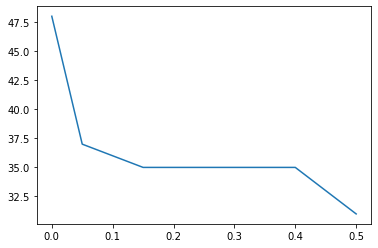

In [69]:
from sklearn.feature_selection import VarianceThreshold
from numpy import arange
from matplotlib import pyplot
df_oil = pd.read_csv('oil-spill.csv',header=None)
# split data into inputs and outputs
data = df_oil.values
X = data[:, :-1]
y = data[:, -1]
print(X.shape, y.shape)
# define thresholds to check
thresholds = arange(0.0, 0.55, 0.05)
# apply transform with each threshold
results = list()
for t in thresholds:
    # define the transform
    transform = VarianceThreshold(threshold=t)
    # transform the input data
    X_sel = transform.fit_transform(X)
    y_test,pred =log_regression(X_sel,y)
    y_test_mlp,y_pred_mlp=mlp(X_sel,y)
    cnf_matrix=confusion_matrix(y_test,pred)
    Sensitivity,Specificity,Precision,NPV,Accuracy = analyse(cnf_matrix)
    cnf_matrix_mlp=confusion_matrix(y_test_mlp,y_pred_mlp)
    Sensitivity_mlp,Specificity_mlp,Precision_mlp,NPV_mlp,Accuracy_mlp = analyse(cnf_matrix_mlp)
    print('Confusion Matriks Lin Reg',cnf_matrix)
    print('Sensitivity lin reg=',Sensitivity)
    print('Specificity lin reg=',Specificity)
    print('Precision lin reg=',Precision)
    print('NPV lin reg=',NPV)
    print('Accuracy lin reg=',Accuracy)
    print('Confusion Matriks MLP',cnf_matrix_mlp)
    print('Sensitivity MLP=',Sensitivity_mlp)
    print('Specificity MLP=',Specificity_mlp)
    print('Precision MLP=',Precision_mlp)
    print('NPV MLP=',NPV_mlp)
    print('Accuracy MLP=',Accuracy_mlp)
    # determine the number of input features
    n_features = X_sel.shape[1]
    print('>Threshold=%.2f, Features=%d' % (t, n_features))
    # store the result
    results.append(n_features)
# plot the threshold vs the number of selected features
pyplot.plot(thresholds, results)
pyplot.show()